In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
import warnings 
from lightgbm import LGBMClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
dot_data = StringIO()
warnings.filterwarnings('ignore')

C:\Users\JDas\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Analysis on C features

In [136]:
cor_c = train_transaction[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]

In [137]:
f = cor_c.corr()

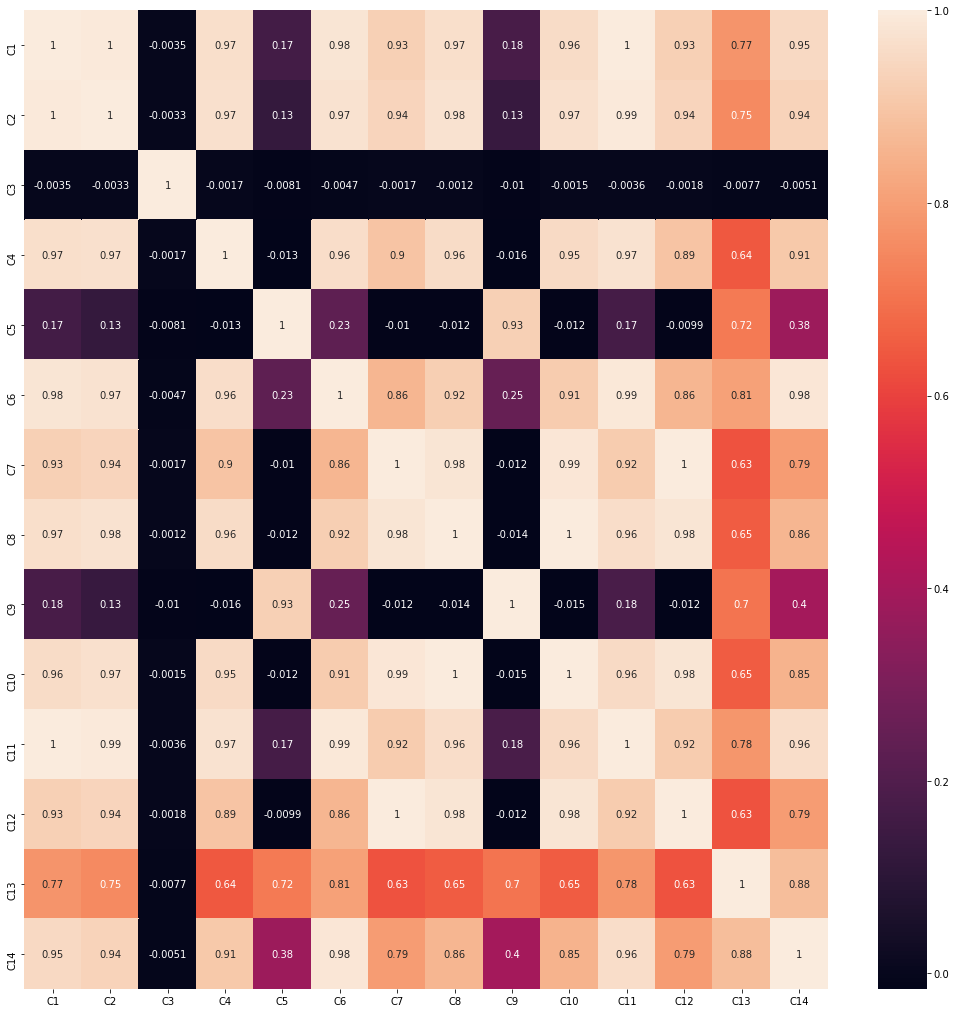

In [138]:
plt.figure(1,figsize=(18,18))
sns.heatmap(f,annot=True)

In [139]:
cor_ctrain = cor_c[:413378]
cor_ccv = cor_c[413378:]

In [140]:
train = train_transaction[:413378]
cv = train_transaction[413378:]

In [141]:
y_train = train['isFraud']
y_cv = cv['isFraud']

In [142]:
#used all C features and applied a model
rf = LGBMClassifier()
rf.fit(cor_ctrain,y_train)
predict_y_=rf.predict_proba(cor_ctrain)
predict_y = rf.predict_proba(cor_ccv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.8917815061670316
cv auc: 0.841067662528683


In [147]:
cor_c = train_transaction[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]
cor_ctrain = cor_c[:413378]
cor_ccv = cor_c[413378:]

In [148]:
#all C features
rf = LGBMClassifier()
rf.fit(cor_ctrain,y_train)
predict_y_=rf.predict_proba(cor_ctrain)
predict_y = rf.predict_proba(cor_ccv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.8871766501586199
cv auc: 0.8353836984550306


In [ ]:
#c2,c3,c6,c11,c12,c8,c7

In [64]:
cor_c = train_transaction[['C1','C2','C4','C5','C9','C10','C13','C14']]

In [ ]:
#6,7,8,12,13,14

In [19]:
def mostPopularValues(datatrain,datatest,feature):
    d = pd.DataFrame(columns=[feature,'countInTrain','MeanTarget','sumTarget','countInTest'])
    d[feature] = list(range(0,10))
    j=0
    for i in datatrain[feature].value_counts().index[:9]:
        d[feature].iloc[j] = i
        d['countInTrain'].iloc[j]=datatrain[feature].value_counts().iloc[j][:10]
        d['MeanTarget'].iloc[j]=datatrain[datatrain[feature]==i]['isFraud'].sum()/datatrain[datatrain[feature]==i].shape[0]
        d['sumTarget'].iloc[j]=datatrain[datatrain[feature]==i]['isFraud'].sum()
        d['countInTest'].iloc[j]=datatest[feature].value_counts().iloc[j][:10]
        j+=1
    return d

#### Best time features found to be hour and AlertEncoding gets cv auc 56.90 without overfitting

In [41]:
train_ = train_transaction[['logTransAmt','ProductCD','card1','card2','card3','card5','addr1','addr2','dist1','dist2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11'
                          ,'C12','C13','C14','D1','D2','D3','D4','D5','D6','D7','D8'
                          ,'D9','D10','D11','D12','D13','D14','D15','hour','alertFeature','TransDecimalCount']]

In [42]:
for i in train_.columns:
    if train_[i].dtypes=="float64":
        train_[i].fillna(train_[i].mean(),inplace=True)

In [46]:
train = train_[:409470]
cv = train_[409470:]
y_train= train_transaction[:409470]
y_cv = train_transaction[409470:]
rf = LGBMClassifier()
rf.fit(train,y_train['isFraud'])
predict_y_=rf.predict_proba(train)
predict_y = rf.predict_proba(cv)
print('train auc:',roc_auc_score(y_train['isFraud'],predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv['isFraud'],predict_y[:,1]))

train auc: 0.9404919556472299
cv auc: 0.8846581840481995


In [67]:
rf.feature_importances_

array([659,  85, 862, 742, 121, 310, 600,  44, 278, 154, 290, 231,  36,
        76, 124, 185,  23,  97, 176,  86, 175,  88, 388, 169, 296, 285,
       175, 246, 133,  74,  22, 239, 102, 304, 156,  61,  77, 128, 370,
       183,  61,  89])

In [68]:
#print('--without class weight balanced')
#89.38(mean)(best till now)
#89.01(median)
#88.98(LGM model imputation)
#print('with class weight balanced')
#89.29(mean)
#89.28(median)
#88.96(LGM model imputation)

#### To check each feature comes from same distribution or not(start)

In [85]:
rf = LGBMClassifier()
x_train = final.drop(['origin'],axis=1)
y_train = final[['origin']]
drop_list = []
for i in x_train.columns:
    print(i)
    rf.fit(x_train[[i]],y_train)
    predict_y_=rf.predict_proba(x_train[[i]])
    print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
    score = roc_auc_score(y_train,predict_y_[:,1])
    if (score > 0.8):
        drop_list.append(i)
    print(i,score)

logTransAmt
train auc: 0.5720253542803578
logTransAmt 0.5720253542803578
ProductCD
train auc: 0.549082737515179
ProductCD 0.549082737515179
card1
train auc: 0.538859456816825
card1 0.538859456816825
card2
train auc: 0.5530284989636737
card2 0.5530284989636737
card3
train auc: 0.510885187729227
card3 0.510885187729227
card5
train auc: 0.5350165276348072
card5 0.5350165276348072
addr1
train auc: 0.5248277789959525
addr1 0.5248277789959525
addr2
train auc: 0.5087327291390138
addr2 0.5087327291390138
dist1
train auc: 0.544532868494088
dist1 0.544532868494088
dist2
train auc: 0.5156275241279097
dist2 0.5156275241279097
C1
train auc: 0.5355369582618554
C1 0.5355369582618554
C2
train auc: 0.5403095147442524
C2 0.5403095147442524
C3
train auc: 0.5002574886617094
C3 0.5002574886617094
C4
train auc: 0.5405598981980602
C4 0.5405598981980602
C5
train auc: 0.5272199231652399
C5 0.5272199231652399
C6
train auc: 0.5317714314941454
C6 0.5317714314941454
C7
train auc: 0.5105695577229388
C7 0.5105695577

#### To check each feature comes from same distribution or not(end)

In [92]:
#2 things need to experiment 
#1)based on fraud impute
#2)remove extreme values from feature

In [101]:
## c1,c2,c4,c6,c7,c10,c11,c12,c13,c14

In [115]:
#analysis on M features
mFeature = train_transaction[['M3','M4','M5','M6','M7','M8','M9','isFraud']]

In [116]:
mFeature.head()

,M3,M4,M5,M6,M7,M9,isFraud
0,T,M2,F,T,F,T,0
1,T,M0,T,T,F,T,0
2,T,M0,F,F,F,F,0
3,T,M0,T,F,F,T,0
4,T,M0,F,F,F,T,0


In [117]:
for i in mFeature.columns:
    if i=='isFraud':
        pass
    else:
        mFeature[i].fillna(mFeature[i].mode()[0],inplace=True)
    

In [30]:
mFeature['M1'].isnull().sum()

0

In [118]:
for i in mFeature.columns:
    if i=='isFraud':
        pass
    else:
        mFeature[i]=le.fit_transform(mFeature[i])
    

In [119]:
mFeature.shape

(590540, 7)

In [39]:
590540*70/100

413378.0

In [120]:
train = mFeature[:413378]
cv = mFeature[413378:]
x_train = train.drop(['isFraud'],axis=1)
y_train = train['isFraud']
x_cv = cv.drop(['isFraud'],axis=1)
y_cv = cv['isFraud']
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

In [121]:
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.6875935051034435
cv auc: 0.700161349501534


In [101]:
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.6958062590137069
cv auc: 0.7117852489967262


In [42]:
corr_m = train.corr()

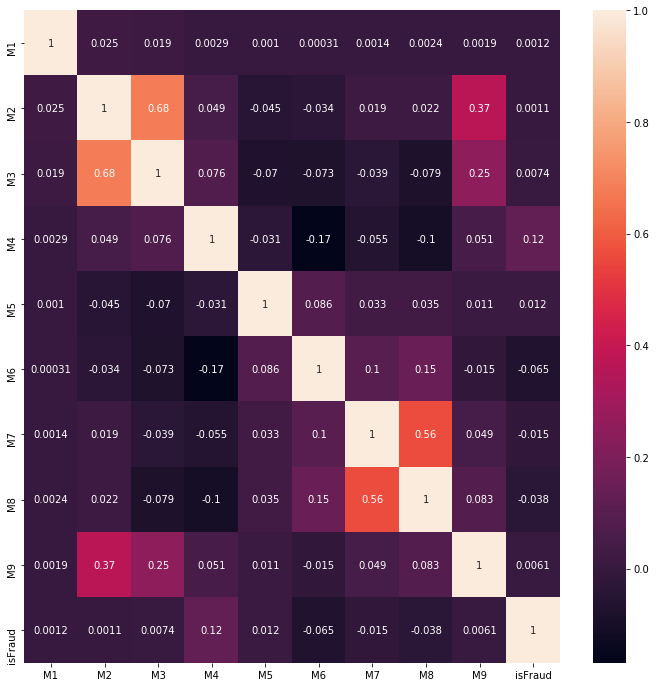

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_m,annot=True)

In [183]:
for i in train_transaction.columns:
    if 'M' in i:
        train_transaction[i].fillna(train_transaction[i].mode()[0],inplace=True)

In [184]:
train_transaction['card4'].fillna(train_transaction['card4'].mode()[0],inplace=True)

In [205]:
train_ = train_transaction[['logTransAmt','ProductCD','card1','card2','card3','card4','card5','addr1','addr2','dist1','dist2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11'
                          ,'C12','C13','C14','D1','D2','D3','D4','D5','D7','D8'
                          ,'D9','D10','D11','D13','D14','D15','hour','alertFeature','TransDecimalCount','M3','M4','M5','M6','M7','M8','M9']]

In [150]:
dFe = train_transaction[['D1','D2','D3','D4','D5','D6','D7','D8'
                          ,'D9','D10','D11','D12','D13','D14','D15']]

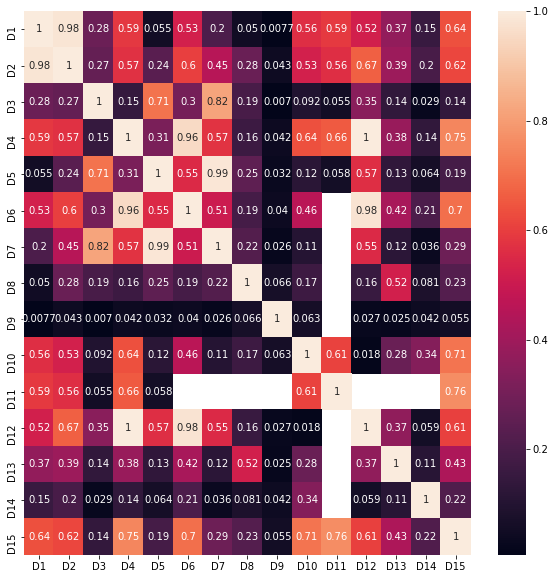

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(dFe.corr(),annot=True)

In [180]:
dFe = train_transaction[['D1','D2','D3','D4','D5','D7','D8'
                          ,'D9','D10','D11','D13','D14','D15']]

In [181]:
for i in dFe.columns:
    dFe[i].fillna(dFe[i].mean(),inplace=True)

In [163]:
#80.87 #80.94(removed D6 and D12)

In [182]:
train = dFe[:413378]
cv = dFe[413378:]
y = train_transaction['isFraud']
y_train = y[:413378]
y_cv=y[413378:]
rf = LGBMClassifier()
rf.fit(train,y_train)
predict_y_=rf.predict_proba(train)
predict_y = rf.predict_proba(cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.8503742700543643
cv auc: 0.8062325624017621


In [206]:
for i in train_.columns:
    if train_[i].dtypes=="float64":
        train_[i].fillna(train_[i].mean(),inplace=True)

In [207]:
for i in train_.columns:
    if 'M' in i:
        train_[i].fillna(train_[i].mode()[0],inplace=True)

In [209]:
for i in train_.columns:
    if 'M' in i:
        train_[i]=le.fit_transform(train_[i])

In [210]:
train_['card4'] = le.fit_transform(train_['card4'])

In [213]:
gtrain= train_transaction[:413378]
gcv = train_transaction[413378:]
y_train = gtrain['isFraud']
y_cv = gcv['isFraud']

In [214]:
x_train = train_[:413378]
x_cv = train_[413378:]

In [93]:
x_train.head()

,logTransAmt,ProductCD,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,alertFeature,TransDecimalCount,M2,M3,M4,M5,M6,M7,M8,M9
0,4.226834,4,13926,362.555488,150.0,142.0,315.0,87.0,19.00000,231.855423,...,3,1,1,1,2,0,1,0,0,1
1,3.367296,4,2755,404.000000,150.0,102.0,325.0,87.0,118.50218,231.855423,...,3,1,1,1,0,1,1,0,0,1
2,4.077537,4,4663,490.000000,150.0,166.0,330.0,87.0,287.00000,231.855423,...,3,1,1,1,0,0,0,0,0,0
3,3.912023,4,18132,567.000000,150.0,117.0,476.0,87.0,118.50218,231.855423,...,3,1,1,1,0,1,0,0,0,1
4,3.912023,1,4497,514.000000,150.0,102.0,420.0,87.0,118.50218,231.855423,...,3,1,1,1,0,0,0,0,0,1


In [131]:
#adding card4
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.9425242841915238
cv auc: 0.8963200825504638


- without adding v features we got best cv auc 89.63

In [202]:
x_train.head()

,logTransAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,...,hour,alertFeature,TransDecimalCount,M3,M4,M5,M6,M7,M8,M9
0,4.226834,4,13926,362.555488,150.0,1,142.0,315.0,87.0,19.00000,...,0,3,1,1,2,0,1,0,0,1
1,3.367296,4,2755,404.000000,150.0,2,102.0,325.0,87.0,118.50218,...,0,3,1,1,0,1,1,0,0,1
2,4.077537,4,4663,490.000000,150.0,3,166.0,330.0,87.0,287.00000,...,0,3,1,1,0,0,0,0,0,0
3,3.912023,4,18132,567.000000,150.0,2,117.0,476.0,87.0,118.50218,...,0,3,1,1,0,1,0,0,0,1
4,3.912023,1,4497,514.000000,150.0,2,102.0,420.0,87.0,118.50218,...,0,3,1,1,0,0,0,0,0,1


#### future we will see if we want to keep D6 and D12 feature or not

In [215]:
#without V features
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.9441751270595581
cv auc: 0.8941047218211408


In [111]:
#removing M1 and M2
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.9433179137886167
cv auc: 0.8940752077393923


In [203]:
x = x_train.columns
val = rf.feature_importances_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

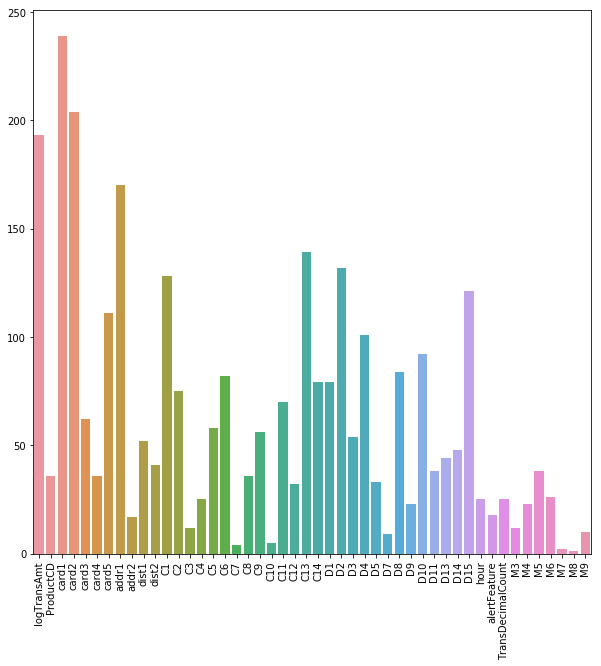

In [204]:
plt.figure(figsize=(10,10))
sns.barplot(x,val)
plt.xticks(rotation=90)

In [135]:
#now analysis on v features

In [14]:
vfeatures=[]
for i in train_transaction.columns:
    if 'V' in i:
        vfeatures.append(i)

In [15]:
vfeatures.append('isFraud')

In [16]:
v = train_transaction[vfeatures]

In [25]:
v = v.fillna(v.mean(),inplace=True)

In [26]:
train = v[:413378]
cv=v[413378:]

In [27]:
#for v mean imputation
train = v[:413378]
cv=v[413378:]
x_train = train.drop(['isFraud'],axis=1)
x_cv = cv.drop(['isFraud'],axis=1)
y_train = train['isFraud']
y_cv = cv['isFraud']
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.8833518025116418
cv auc: 0.8457522949145864


In [19]:
#for v model imputation
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.8859323483279665
cv auc: 0.8427532355154567


In [28]:
g = rf.feature_importances_

In [238]:
g = rf.feature_importances_
j=1
vremove=[]
for i in g:
    if i==0:
        vremove.append('V'+str(j))
    j+=1

In [247]:
vfinal = v.drop(vremove,axis=1)

In [248]:
vfinal.head()

,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,isFraud
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [249]:
train = vfinal[:413378]
cv=vfinal[413378:]
x_train = train.drop(['isFraud'],axis=1)
x_cv = cv.drop(['isFraud'],axis=1)
y_train = train['isFraud']
y_cv = cv['isFraud']
rf = LGBMClassifier()
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.8846017301805447
cv auc: 0.8441044084863842


In [250]:
#88.33
#84.57
#conclusion replace with mean

In [253]:
vfinal = vfinal.fillna(vfinal.mean(),inplace=True)

In [255]:
vcorr = vfinal.corr()

In [ ]:
train_transaction['P_emaildomain_bin','R_']

In [155]:
features = ['logTransAmt','ProductCD','card1','card2','card3','card4','card5','addr1','addr2','dist1','dist2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11'
                          ,'C12','C13','C14','D1','D2','D3','D4','D5','D6','D7','D8'
                          ,'D9','D10','D11','D12','D13','D14','D15','hour','alertFeature','TransDecimalCount','M3','M4','M5','M6','M7','M8','M9','isFraud','P_emaildomain_bin','R_emaildomain_bin']

In [156]:
j=1
for i in g:
    if i==0:
        pass
    else:
        features.append('V'+str(j))
    j+=1

In [157]:
features

['logTransAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'hour',
 'alertFeature',
 'TransDecimalCount',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'isFraud',
 'P_emaildomain_bin',
 'R_emaildomain_bin',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V17',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V29',
 'V30',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V73',
 'V74',
 'V75',
 'V76',


In [158]:
train_ = train_transaction[features]

In [159]:
train_.head()

,logTransAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,4.226834,4,13926,NaN,150.0,discover,142.0,315.0,87.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.367296,4,2755,404.0,150.0,mastercard,102.0,325.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.077537,4,4663,490.0,150.0,visa,166.0,330.0,87.0,287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.912023,4,18132,567.0,150.0,mastercard,117.0,476.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.912023,1,4497,514.0,150.0,mastercard,102.0,420.0,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
#adding all features+email+vfeatures-(D6 and D12)
rf = LGBMClassifier(class_weight='balanced')
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.9450047439645407
cv auc: 0.9010308250524144


In [184]:
#lGM needs to properly tunned

train auc: 0.9964091338812946
cv auc: 0.9111697068052944


In [178]:
#adding all features+email+vfeatures+(D6 and D12)
rf = LGBMClassifier(class_weight='balanced')
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.9444638492935056
cv auc: 0.9004646852280322


- Adding all the features i found best auc 90.10(without M1 and M2 and D6 and D12)  till now with classweight=balanced

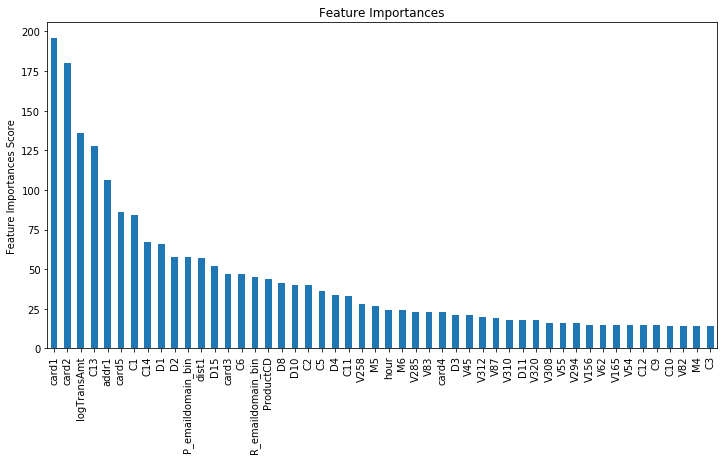

In [149]:
LGB_feature_importance = pd.Series(rf.feature_importances_,x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
LGB_feature_importance[: 50].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importances Score')
plt.show()

In [ ]:
id_conti = df[['01','02','03','04','05','06','07','08','09','10','11']]

In [14]:
id_01_des = describe(df,df_test,'id_01')

In [15]:
id_01_des

,id_01,Train,TrainFraud,TrainLegit,Test
0,count,144233,3789,140444,141907
1,mean,-10.1705,-10.0649,-10.1734,-11.3257
2,std,14.3479,14.2398,14.3509,14.5085
3,min,-100,-100,-100,-100
4,25%,-10,-10,-10,-12.5
5,50%,-5,-5,-5,-5
6,75%,-5,-5,-5,-5
7,max,0,0,0,0
8,unique,78,27,78,81
9,NaN,446307,16874,429433,364784


In [21]:
id_02_des = describe(df,df_test,'id_02')

In [22]:
id_02_des

,id_02,Train,TrainFraud,TrainLegit,Test
0,count,140872,3697,137175,136976
1,mean,174717,168692,174879,192659
2,std,159652,153763,159805,182613
3,min,1,166,1,2
4,25%,67992,65844,68049,63339.5
5,50%,125800,122174,125913,133190
6,75%,228749,222357,228898,265718
7,max,999595,986458,999595,999869
8,unique,115656,3679,113146,114869
9,NaN,449668,16966,432702,369715


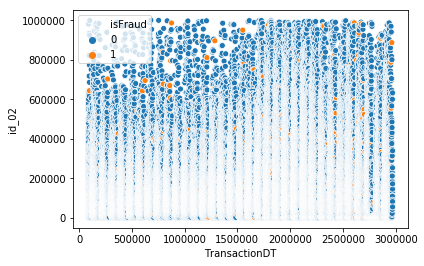

In [24]:
sns.scatterplot(x="TransactionDT",y="id_02",hue='isFraud',data=df[~df['id_02'].isnull()])

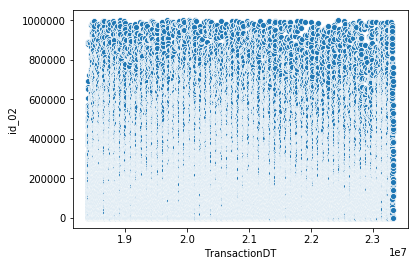

In [25]:
sns.scatterplot(x="TransactionDT",y="id_02",data=df_test[~df_test['id_02'].isnull()])

In [23]:
id_03_des = describe(df,df_test,'id_03')

In [26]:
id_03_des

,id_03,Train,TrainFraud,TrainLegit,Test
0,count,66324,1764,64560,66481
1,mean,0.0601894,0.0464853,0.0605638,0.0530076
2,std,0.598231,0.558637,0.599276,0.684551
3,min,-13,-7,-13,-12
4,25%,0,0,0,0
5,50%,0,0,0,0
6,75%,0,0,0,0
7,max,10,5,10,11
8,unique,25,12,25,23
9,NaN,524216,18899,505317,440210


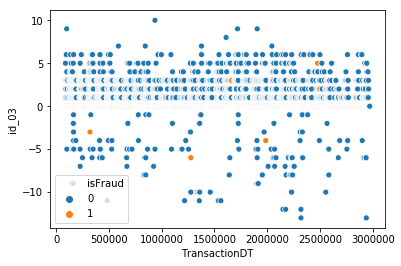

In [27]:
sns.scatterplot(x="TransactionDT",y="id_03",hue='isFraud',data=df[~df['id_03'].isnull()])

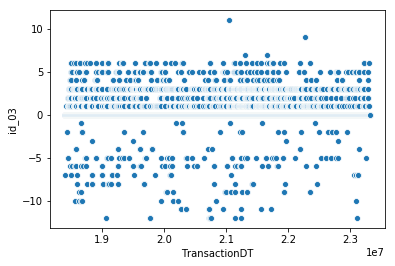

In [28]:
sns.scatterplot(x="TransactionDT",y="id_03",data=df_test[~df_test['id_03'].isnull()])

In [31]:
id_04_des = describe(df,df_test,'id_04')

In [32]:
id_04_des

,id_04,Train,TrainFraud,TrainLegit,Test
0,count,66324,1764,64560,66481
1,mean,-0.0589379,-0.079932,-0.0583643,-0.0874536
2,std,0.701015,0.847314,0.696586,0.840351
3,min,-28,-13,-28,-19
4,25%,0,0,0,0
5,50%,0,0,0,0
6,75%,0,0,0,0
7,max,0,0,0,0
8,unique,16,11,16,16
9,NaN,524216,18899,505317,440210


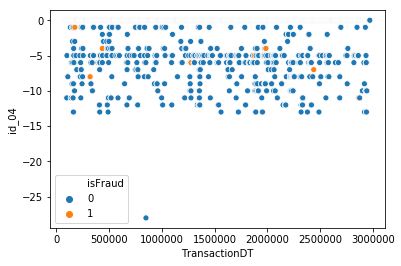

In [33]:
sns.scatterplot(x="TransactionDT",y="id_04",hue='isFraud',data=df[~df['id_04'].isnull()])

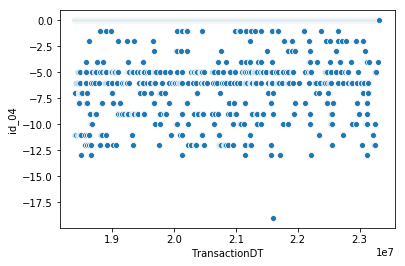

In [34]:
sns.scatterplot(x="TransactionDT",y="id_04",data=df_test[~df_test['id_04'].isnull()])

In [35]:
id_05_des = describe(df,df_test,'id_05')

In [36]:
id_05_des

,id_05,Train,TrainFraud,TrainLegit,Test
0,count,136865,3581,133284,134750
1,mean,1.61558,1.68417,1.61374,1.24603
2,std,5.24986,5.49651,5.24308,5.07139
3,min,-72,-39,-72,-81
4,25%,0,0,0,0
5,50%,0,0,0,0
6,75%,1,1,1,1
7,max,52,48,52,52
8,unique,94,64,92,91
9,NaN,453675,17082,436593,371941


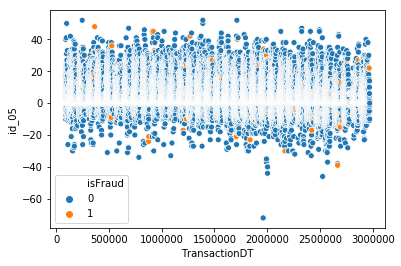

In [37]:
sns.scatterplot(x="TransactionDT",y="id_05",hue='isFraud',data=df[~df['id_05'].isnull()])

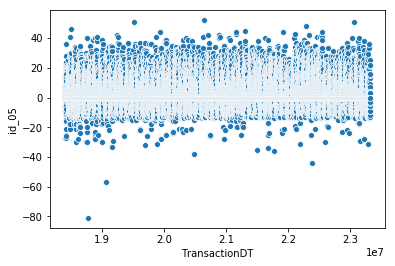

In [38]:
sns.scatterplot(x="TransactionDT",y="id_05",data=df_test[~df_test['id_05'].isnull()])

In [39]:
id_06_des = describe(df,df_test,'id_06')

In [40]:
id_06_des

,id_06,Train,TrainFraud,TrainLegit,Test
0,count,136865,3581,133284,134750
1,mean,-6.69871,-6.5437,-6.70288,-6.80383
2,std,16.4911,15.8118,16.509,15.9215
3,min,-100,-100,-100,-100
4,25%,-6,-6,-6,-6
5,50%,0,0,0,0
6,75%,0,0,0,0
7,max,0,0,0,0
8,unique,102,71,102,102
9,NaN,453675,17082,436593,371941


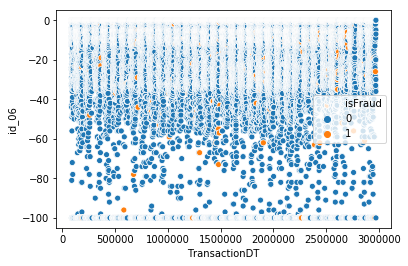

In [41]:
sns.scatterplot(x="TransactionDT",y="id_06",hue='isFraud',data=df[~df['id_06'].isnull()])

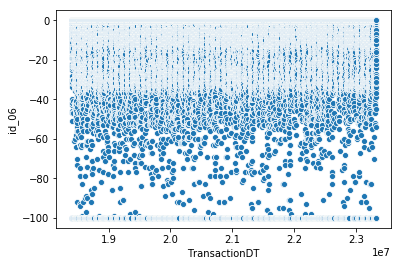

In [43]:
sns.scatterplot(x="TransactionDT",y="id_06",data=df_test[~df_test['id_06'].isnull()])

In [44]:
id_07_des = describe(df,df_test,'id_07')

In [45]:
id_07_des

,id_07,Train,TrainFraud,TrainLegit,Test
0,count,5155,135,5020,5059
1,mean,13.2854,12.5481,13.3052,12.4932
2,std,11.3842,11.1594,11.3906,11.6782
3,min,-46,-31,-46,-41
4,25%,5,4,5,3
5,50%,14,13,14,12
6,75%,22,19.5,22,21
7,max,61,38,61,59
8,unique,85,41,85,82
9,NaN,585385,20528,564857,501632


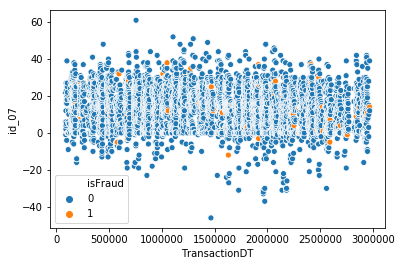

In [46]:
sns.scatterplot(x="TransactionDT",y="id_07",hue='isFraud',data=df[~df['id_07'].isnull()])

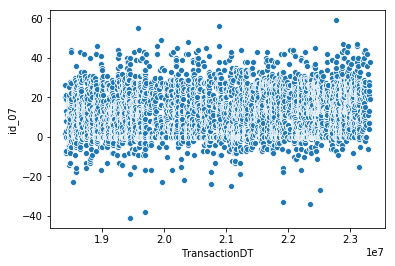

In [47]:
sns.scatterplot(x="TransactionDT",y="id_07",data=df_test[~df_test['id_07'].isnull()])

In [48]:
id_08_des = describe(df,df_test,'id_08')

In [49]:
id_08_des

,id_08,Train,TrainFraud,TrainLegit,Test
0,count,5155,135,5020,5059
1,mean,-38.6004,-39.2889,-38.5819,-36.5778
2,std,26.0849,27.6065,26.0454,25.5442
3,min,-100,-100,-100,-100
4,25%,-48,-48,-49,-46
5,50%,-34,-33,-34,-33
6,75%,-23,-23,-23,-23
7,max,0,0,0,0
8,unique,95,50,95,91
9,NaN,585385,20528,564857,501632


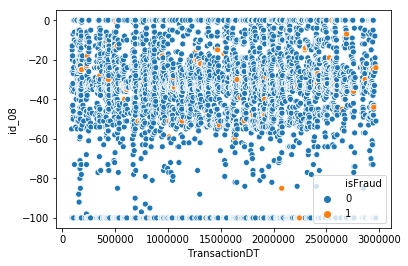

In [50]:
sns.scatterplot(x="TransactionDT",y="id_08",hue='isFraud',data=df[~df['id_08'].isnull()])

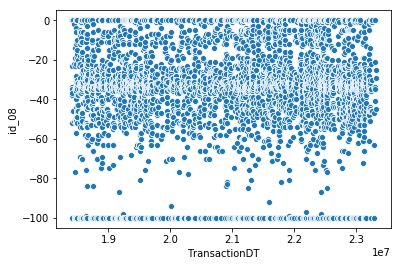

In [51]:
sns.scatterplot(x="TransactionDT",y="id_08",data=df_test[~df_test['id_08'].isnull()])

In [52]:
id_09_des = describe(df,df_test,'id_09')

In [53]:
id_09_des

,id_09,Train,TrainFraud,TrainLegit,Test
0,count,74926,1979,72947,74338
1,mean,0.0910231,0.0828701,0.0912443,0.0762194
2,std,0.983842,0.867457,0.986812,1.00969
3,min,-36,-9,-36,-32
4,25%,0,0,0,0
5,50%,0,0,0,0
6,75%,0,0,0,0
7,max,25,10,25,16
8,unique,47,18,47,39
9,NaN,515614,18684,496930,432353


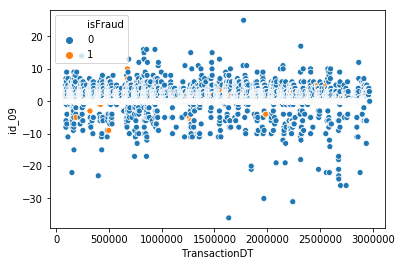

In [54]:
sns.scatterplot(x="TransactionDT",y="id_09",hue='isFraud',data=df[~df['id_09'].isnull()])

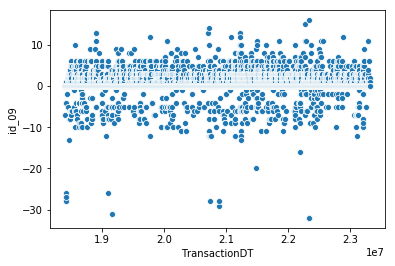

In [55]:
sns.scatterplot(x="TransactionDT",y="id_09",data=df_test[~df_test['id_09'].isnull()])

In [56]:
id_10_des = describe(df,df_test,'id_10')

In [57]:
id_10_des

,id_10,Train,TrainFraud,TrainLegit,Test
0,count,74926,1979,72947,74338
1,mean,-0.301124,-0.276402,-0.301794,-0.245877
2,std,2.78945,2.10539,2.80569,2.12053
3,min,-100,-49,-100,-100
4,25%,0,0,0,0
5,50%,0,0,0,0
6,75%,0,0,0,0
7,max,0,0,0,0
8,unique,63,20,63,53
9,NaN,515614,18684,496930,432353


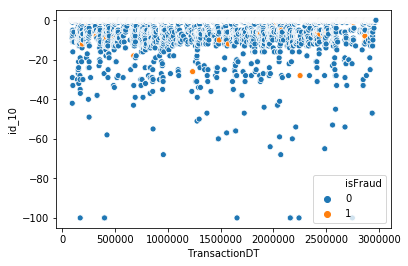

In [58]:
sns.scatterplot(x="TransactionDT",y="id_10",hue='isFraud',data=df[~df['id_10'].isnull()])

In [59]:
id_11_des = describe(df,df_test,'id_11')

In [60]:
id_11_des

,id_11,Train,TrainFraud,TrainLegit,Test
0,count,140978,3699,137279,136778
1,mean,99.7453,99.7611,99.7449,99.7509
2,std,1.1276,1.10671,1.12816,1.11982
3,min,90,90,90,90
4,25%,100,100,100,100
5,50%,100,100,100,100
6,75%,100,100,100,100
7,max,100,100,100,100
8,unique,366,85,360,302
9,NaN,449562,16964,432598,369913


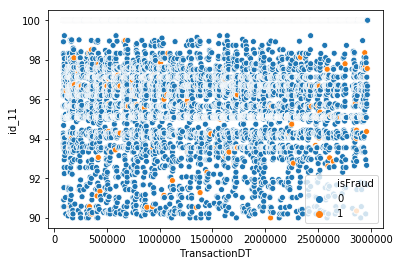

In [61]:
sns.scatterplot(x="TransactionDT",y="id_11",hue='isFraud',data=df[~df['id_11'].isnull()])

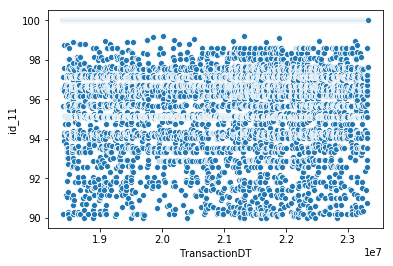

In [62]:
sns.scatterplot(x="TransactionDT",y="id_11",data=df_test[~df_test['id_11'].isnull()])

In [98]:
train_ = df[['id_02','isFraud']]

In [99]:
id_corr = train_.corr()

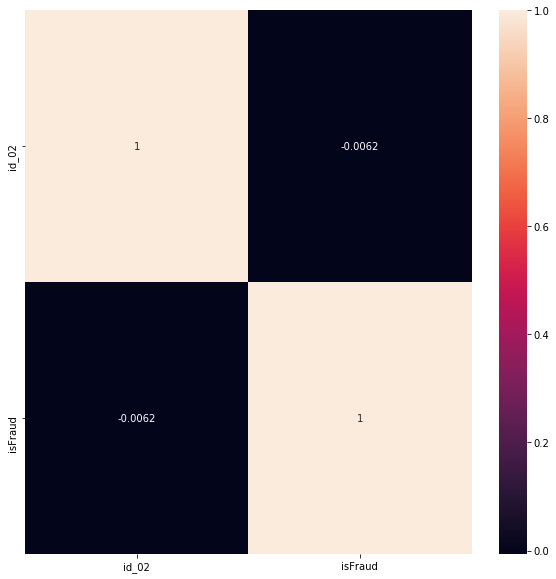

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(id_corr,annot=True)

In [94]:
for i in train_.columns:
    if i=='isFraud':
        pass
    else:
        train_[i].fillna(train_[i].mean(),inplace=True)

In [101]:
#from id_01 to id_11 features
train = train_[:413378]
cv=train_[413378:]
rf = LGBMClassifier(n_estimators=100,max_depth=3)
x_train = train.drop(['isFraud'],axis=1)
y_train = train['isFraud']
x_cv = cv.drop(['isFraud'],axis=1)
y_cv = cv['isFraud']
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.5494910214687941
cv auc: 0.5


In [88]:
l = ['13','14','17','18','19','20','21','22','24','25','26','32']
for i in l:
    d = describe(df,df_test,'id_'+i)
    print('for id_'+i)
    print(d)

for id_13
       id_13     Train TrainFraud TrainLegit      Test
0      count    127320       3334     123986    130286
1       mean   48.0531    48.2618    48.0475   36.9057
2        std   11.7749    11.7943    11.7743   13.2067
3        min        10         11         10        11
4        25%        49         49         49        27
5        50%        52         52         52        27
6        75%        52         52         52        52
7        max        64         64         64        63
8     unique        55         29         55        28
9        NaN    463220      17329     445891    376405
10  NaNshare  0.784401   0.838649   0.782434  0.742869
for id_14
       id_14     Train TrainFraud TrainLegit      Test
0      count     80044       2140      77904     71357
1       mean  -344.507   -344.131   -344.517  -344.483
2        std   93.6955    95.0527    93.6585   93.6332
3        min      -660       -600       -660      -720
4        25%      -360       -360       -360 

In [89]:
train_ = df[['id_01','id_02','id_03','id_04','id_05','id_06','id_07','id_08','id_10','id_11',
             'id_13','id_14','id_17','id_18','id_19','id_20','id_21','id_22','id_24','id_25',
             'id_26','id_32','isFraud']]

In [90]:
id_co = train_.corr()

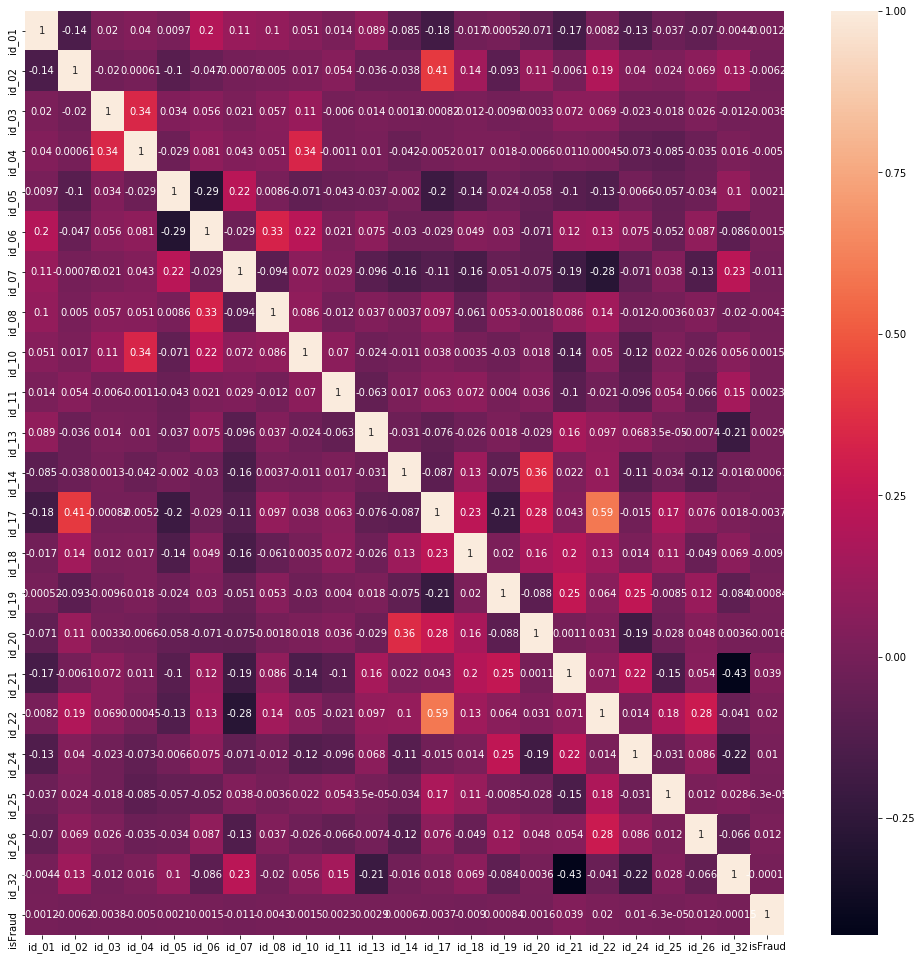

In [93]:
plt.figure(figsize=(17,17))
sns.heatmap(id_co,annot=True)

In [103]:
#id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31

In [142]:
#train_ = df[['id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_30','id_31','isFraud']]
train_ = df[['id_12','id_15','id_16','id_23','id_27','id_28','id_29','id_30','id_31','isFraud']]

In [143]:
train_.head()

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,isFraud
0,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,0
1,NotFound,New,NotFound,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,0
2,NotFound,Found,Found,NaN,NaN,Found,Found,NaN,chrome 62.0,0
3,NotFound,New,NotFound,NaN,NaN,New,NotFound,NaN,chrome 62.0,0
4,NotFound,Found,Found,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,0


In [134]:
for i in train_.columns:
    if i=='isFraud':
        pass
    else:
        train_[i].fillna(train_[i].mode()[0],inplace=True)

In [135]:
le = LabelEncoder()

In [136]:
train_['id_12']=le.fit_transform(train_['id_12'])

In [137]:
train_['id_15']=le.fit_transform(train_['id_15'])

In [115]:
train_['id_16']=le.fit_transform(train_['id_16'])

In [138]:
train_['id_27']=le.fit_transform(train_['id_27'])

In [117]:
train_['id_28']=le.fit_transform(train_['id_28'])

In [129]:
train_['id_29']=le.fit_transform(train_['id_29'])

In [139]:
train_.head()

,id_12,id_15,id_27,isFraud
0,1,1,0,0
1,1,1,0,0
2,1,0,0,0
3,1,1,0,0
4,1,0,0,0


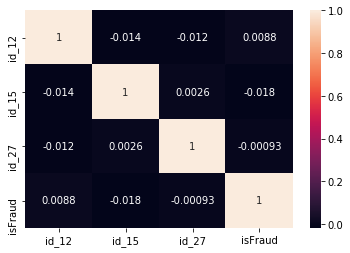

In [140]:
sns.heatmap(train_.corr(),annot=True)

In [141]:
#from id_01 to id_11 features
train = train_[:413378]
cv=train_[413378:]
rf = LGBMClassifier()
x_train = train.drop(['isFraud'],axis=1)
y_train = train['isFraud']
x_cv = cv.drop(['isFraud'],axis=1)
y_cv = cv['isFraud']
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.5299055388291474
cv auc: 0.5


In [55]:
#from id_01 to id_11 features
train = train_[:413378]
cv=train_[413378:]
rf = LGBMClassifier()
x_train = train.drop(['isFraud'],axis=1)
y_train = train['isFraud']
x_cv = cv.drop(['isFraud'],axis=1)
y_cv = cv['isFraud']
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.524450073168579
cv auc: 0.5


In [56]:
#indivdual features has no imporatace at all
#lets combine all of them and see 

In [73]:
train_ = df[['id_01','id_02','id_03','id_04','id_05','id_06','id_07','id_08','id_10','id_11',
             'id_13','id_14','id_17','id_18','id_19','id_20','id_21','id_22','id_24','id_25',
             'id_26','DeviceType','lastest_browser','DeviceCorp','isFraud']]

In [87]:
#from id_01 to id_11 features
train = train_[:413378]
cv=train_[413378:]
rf = LGBMClassifier(reg_lambda=5,max_depth=13)
x_train = train.drop(['isFraud'],axis=1)
y_train = train['isFraud']
x_cv = cv.drop(['isFraud'],axis=1)
y_cv = cv['isFraud']
rf.fit(x_train,y_train)
predict_y_=rf.predict_proba(x_train)
predict_y = rf.predict_proba(x_cv)
print('train auc:',roc_auc_score(y_train,predict_y_[:,1]))
print('cv auc:',roc_auc_score(y_cv,predict_y[:,1]))

train auc: 0.5936662470911137
cv auc: 0.5


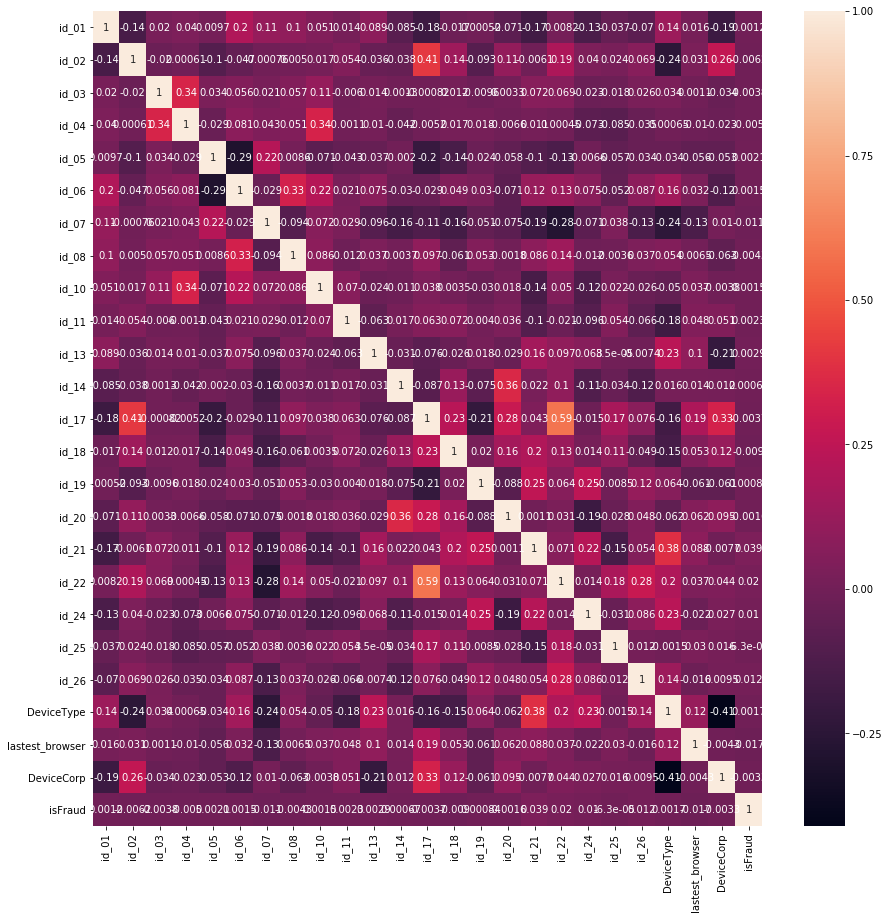

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(all_features,annot=True)

### Summary of Feature selection and analysis on identity data

- For only C features we have used a LGBM model and see that all C feaures are important.
- For only D features we have used a LGBM model and see that if we exclude D6 and D12 we donot have any effecton cv auc.Hence we remove it.
- For only M feaures we have used a LGBM model and see that without M1 and M2 auc still remains constant.Hence we will remove it.
- For only V features we have used a LGBM model and see that many V features are redundant means they have a feature importance 0.we will remove it as well.
- Done the analysis on identity feaures got no intersting and high amount of null values.
- We have done some feature Engineering in the first part on identity data.
- We have used a LGBM model without the feaure engineering and found out that all id features are useless train auc we got 56 where as cv auc 50 means a dumb and overfitted model.
- Hence in the modelling part we will remove all of the id features and only keep the featured enginnered part of id features.
